<a href="https://colab.research.google.com/github/XzeraSpartan/CMPE-255-Data-Mining-Project-Group-5/blob/main/CMPE_255_Data_Mining_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMPE 255: Data Mining Project
# Smart Energy Advisor: A Data-Driven Approach to Household Energy Conservation

### - Sai Anuraghav Savadam (016882437)
### - Shireen Faraha Shaik (017402801)
### - Hardi Trivedi(016589768)


### Importing Libraries

In [1]:
import pandas as pd
import zipfile
import os


### Loading Dataset and Data Preprocessing

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/Shareddrives/CMPE_255_Dataset/household_power_consumption.txt", sep=';', parse_dates={'Datetime': ['Date', 'Time']},
                 infer_datetime_format=True, na_values=['?'])

df.dropna(inplace=True)

In [4]:
def add_time_features(df):
    df['year'] = df['Datetime'].dt.year
    df['month'] = df['Datetime'].dt.month
    df['day'] = df['Datetime'].dt.day
    df['hour'] = df['Datetime'].dt.hour
    df['day_of_week'] = df['Datetime'].dt.dayofweek
    df['weekend'] = (df['day_of_week'] >= 5).astype(int)
    return df

# Apply feature engineering to the dataset
df = add_time_features(df)

### Exploratory Data Analysis

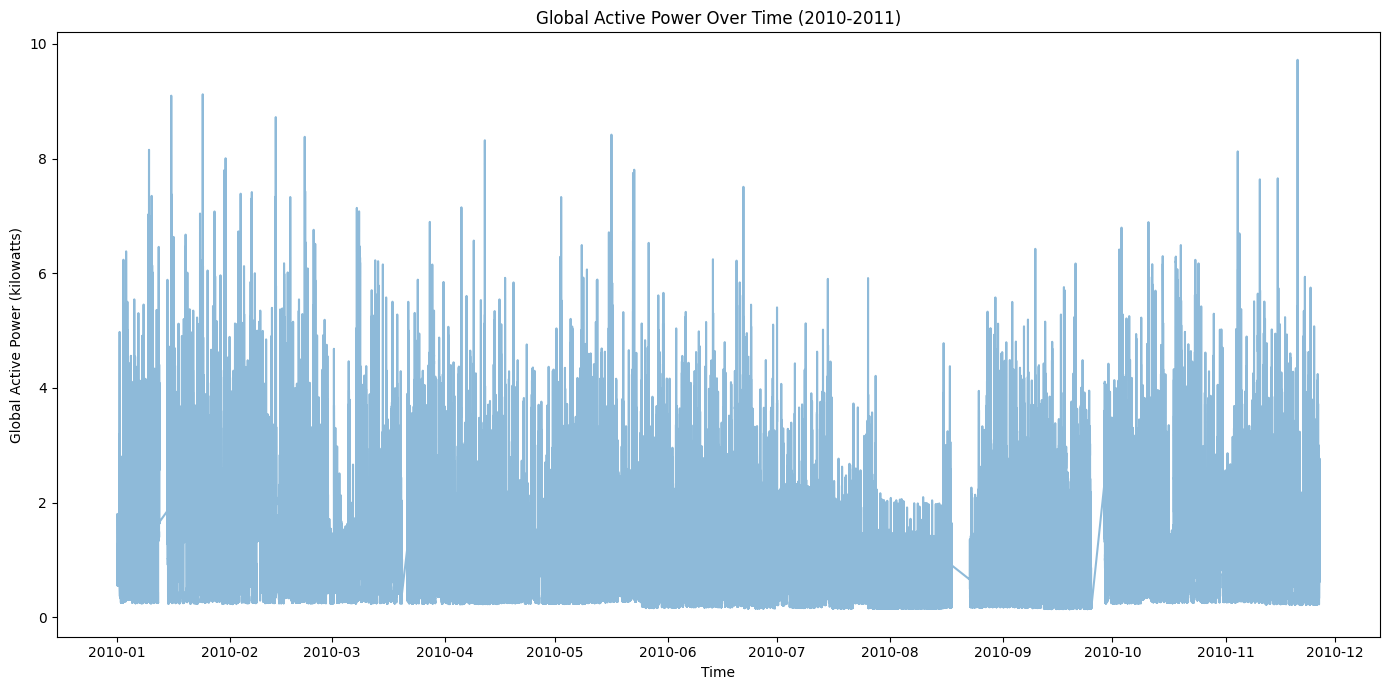

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame for the timeframe of 2010 to 2011
df_2010_2011 = df[(df['Datetime'] >= '2010-01-01') & (df['Datetime'] <= '2011-12-31')]

# Now plot the filtered data
plt.figure(figsize=(14, 7))
plt.plot(df_2010_2011['Datetime'], df_2010_2011['Global_active_power'], alpha=0.5)
plt.title('Global Active Power Over Time (2010-2011)')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kilowatts)')
plt.tight_layout()
#plt.savefig('global_active_power_2010_2011.png')
plt.show()
plt.close()


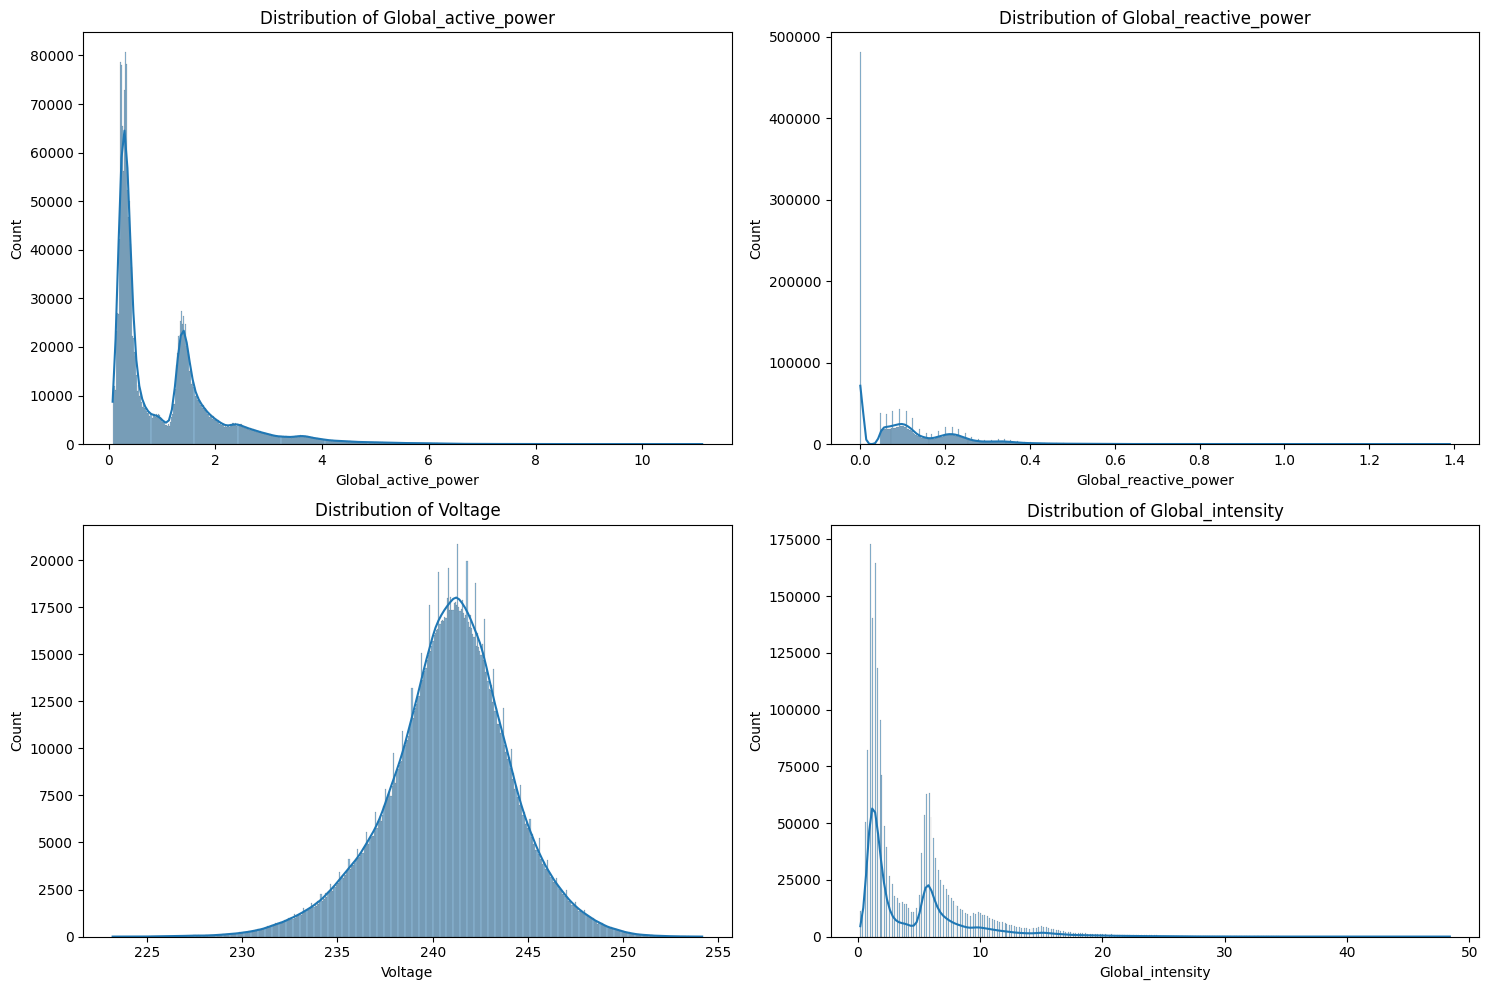

In [ ]:
# EDA: Distribution of variables
numerical_features = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
#plt.savefig('distribution_of_variables.png')
plt.show()
plt.close()



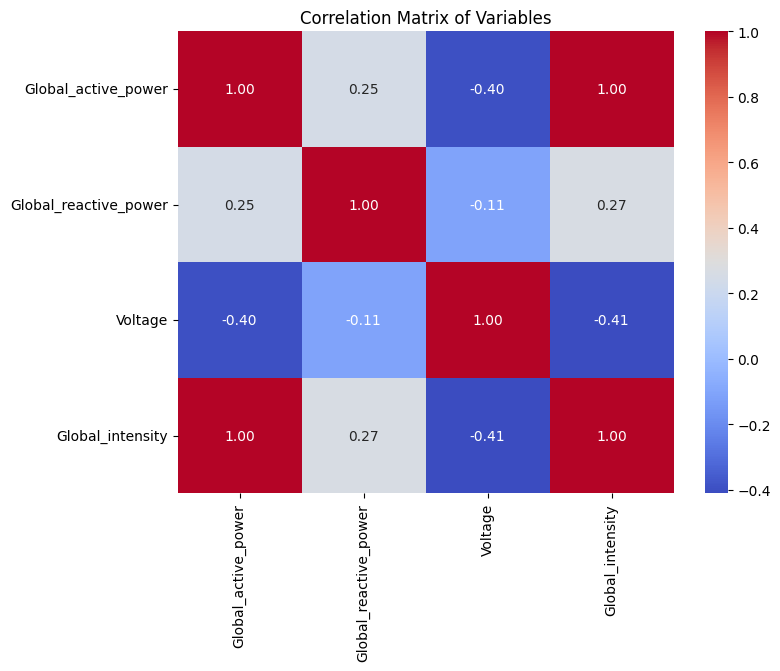

In [ ]:
# EDA: Correlation analysis
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Variables')
#plt.savefig('correlation_matrix.png')
plt.show()
plt.close()

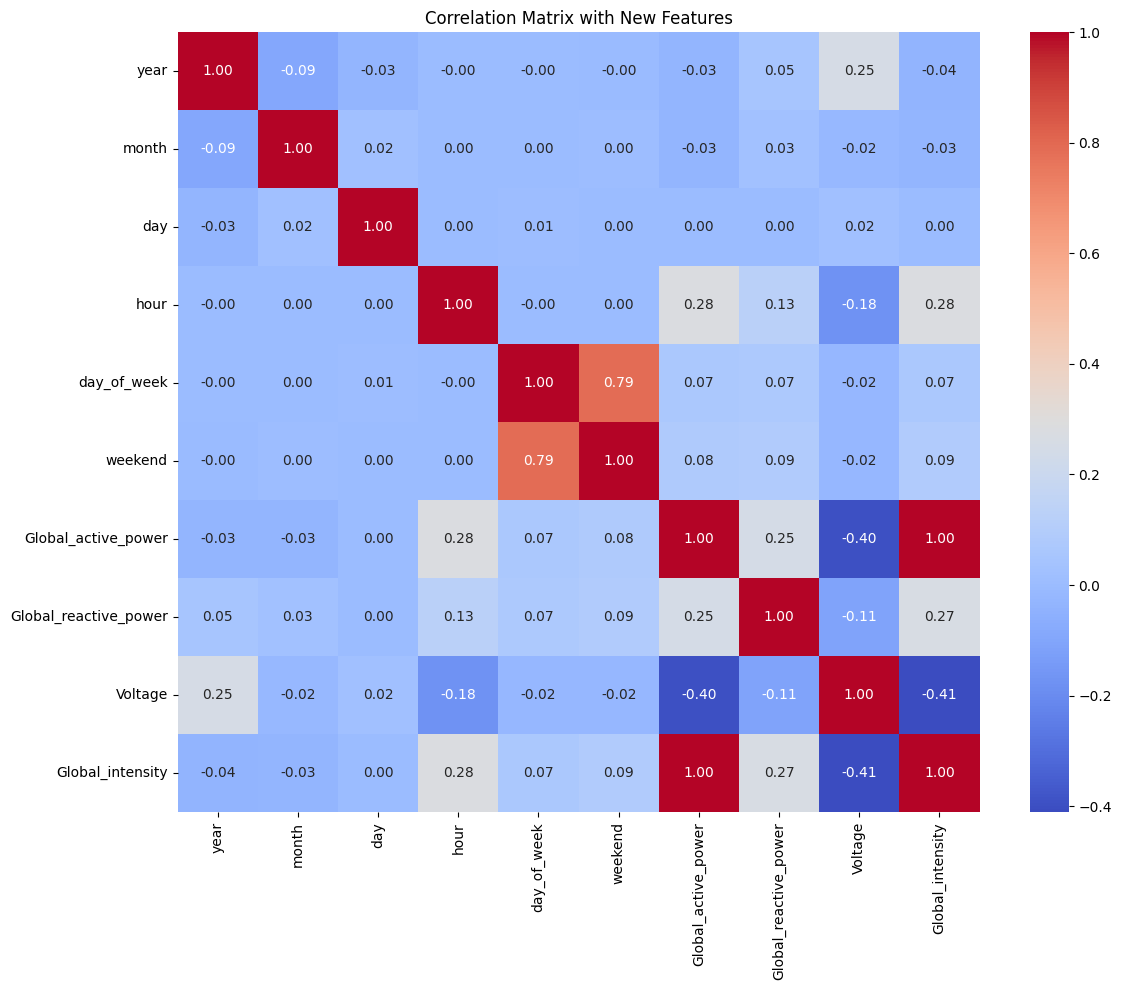

In [ ]:
# Correlation heatmap with the new features
new_features = ['year', 'month', 'day', 'hour', 'day_of_week', 'weekend'] + numerical_features
correlation_matrix_new = df[new_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_new, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix with New Features')
plt.tight_layout()
#plt.savefig('correlation_matrix_new_features.png')
plt.show()
plt.close()

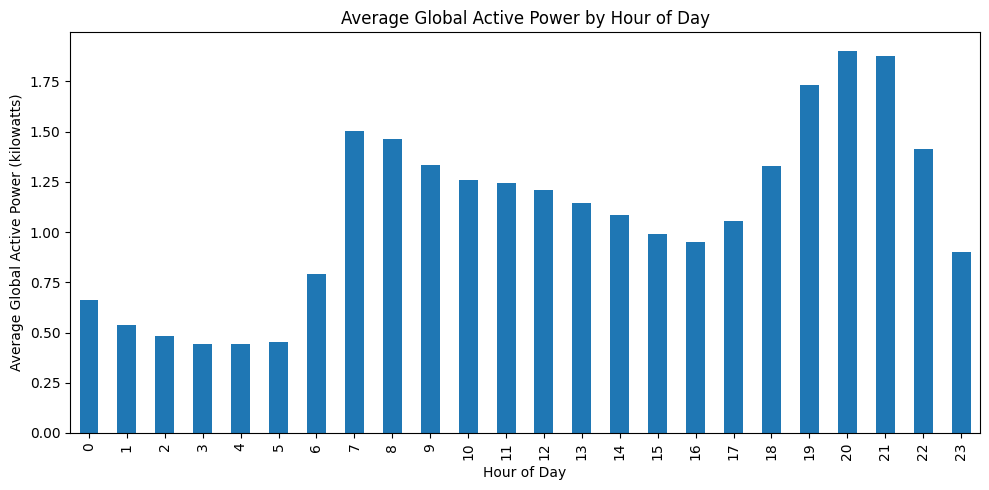

In [ ]:
# Group by time of day and plot average consumption
hourly_consumption = df.groupby('hour')['Global_active_power'].mean()
plt.figure(figsize=(10, 5))
hourly_consumption.plot(kind='bar')
plt.title('Average Global Active Power by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Global Active Power (kilowatts)')
plt.tight_layout()
#plt.savefig('average_power_by_hour.png')
plt.show()
plt.close()




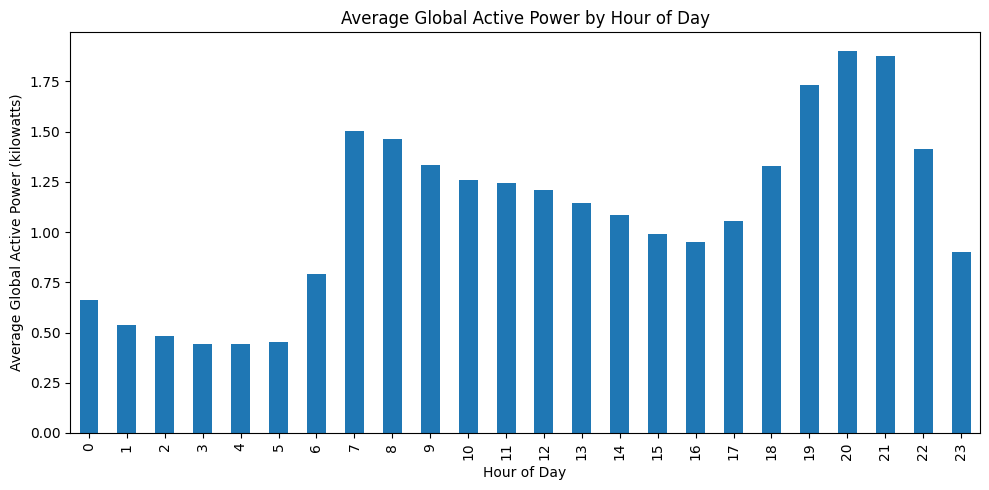

In [ ]:
# Group by time of day and plot average consumption
hourly_consumption = df.groupby('hour')['Global_active_power'].mean()
plt.figure(figsize=(10, 5))
hourly_consumption.plot(kind='bar')
plt.title('Average Global Active Power by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Global Active Power (kilowatts)')
plt.tight_layout()
#plt.savefig('average_power_by_hour.png')
plt.show()
plt.close()


#Insights for RNN

### Clustering



In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

features = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
# Assuming df is your DataFrame and 'features' is a list of feature column names
X = df[features].values

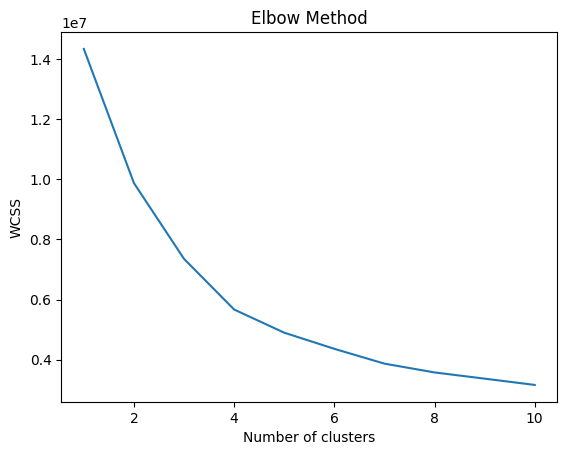

In [ ]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Using the Elbow method to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.show()

In [ ]:
# Choose the number of clusters based on the plot
num_clusters = 4

# Apply K-means with the optimal number of clusters
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_scaled)


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
from sklearn.metrics import silhouette_score
import numpy as np
# Calculate the silhouette score using the output of PCA
silhouette_avg_pca = silhouette_score(X_pca, y_kmeans, sample_size=min(10000, len(X_pca)), n_jobs=-1)
print('The average silhouette score after PCA is:', silhouette_avg_pca)


The average silhouette score after PCA is: 0.5512403678588726


In [ ]:
from sklearn.metrics import davies_bouldin_score

# Assuming y_kmeans are the cluster labels from the K-means algorithm
# and X_scaled is the feature matrix after scaling

# Calculate the Davies-Bouldin score
db_index = davies_bouldin_score(X_pca, y_kmeans)

print('The Davies-Bouldin index is:', db_index)


The Davies-Bouldin index is: 0.8424590536744099


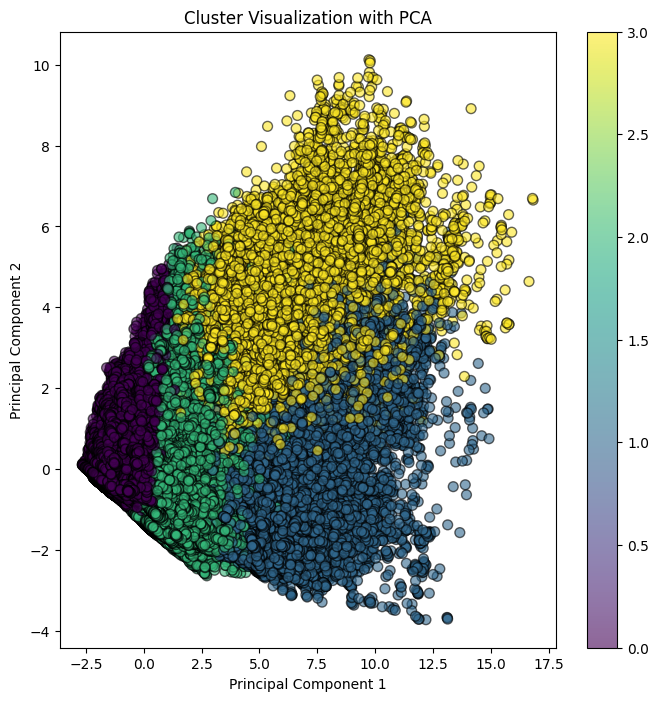

In [ ]:
# Visualize the clusters after PCA
plt.figure(figsize=(8, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.6)
plt.title('Cluster Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()


In [ ]:
# Add the cluster labels to your original DataFrame
df['Cluster'] = y_kmeans

# Save the DataFrame with the cluster labels
df.to_csv('clustered_data.csv', index=False)

Experiment

In [ ]:
!pip install hdbscan


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 54.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039179 sha256=481d96e9351f1d68d8bfbe92c79023b43d6cc99e27805f12a42cdda3605db80c
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.5
    Uninstalling Cython-3.0.5:
      Successfully uninstalled Cython-3.0.5


In [ ]:
import hdbscan
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
# Define the list of feature column names
features = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# Sample size (adjust as needed)
sample_size = 100000

# Perform stratified sampling based on a specific column (e.g., 'Global_intensity')
stratified_sample = df.groupby('Global_intensity', group_keys=False).apply(lambda x: x.sample(int(sample_size/len(df) * len(x))))

# Extract the selected features
X = stratified_sample[features].values

# Scale the features
X_scaled = StandardScaler().fit_transform(X)

In [ ]:
# Apply HDBSCAN to the reduced-dimension data
clusterer = hdbscan.HDBSCAN(min_cluster_size=5000, gen_min_span_tree=True)

# Fit the clusterer to the data
clusterer.fit(X_scaled)

In [ ]:
# Predict the cluster labels
labels = clusterer.labels_

# Generate the cluster probability scores
probabilities = clusterer.probabilities_

# Optionally, generate the single linkage tree
tree = clusterer.single_linkage_tree_

# Optionally, generate the condensed tree
condensed_tree = clusterer.condensed_tree_

# Optionally, generate the minimum spanning tree
spanning_tree = clusterer.minimum_spanning_tree_

In [ ]:
# Calculate the silhouette score for the clustered points
clustered = (labels >= 0)
if sum(clustered) > 1:  # Silhouette score requires at least 2 points
    silhouette_avg = silhouette_score(X_scaled[clustered], labels[clustered])
    print('The average silhouette_score for the clustered data is:', silhouette_avg)
else:
    print('Not enough clustered points to calculate a silhouette score.')

The average silhouette_score for the clustered data is: 0.5093834713522142


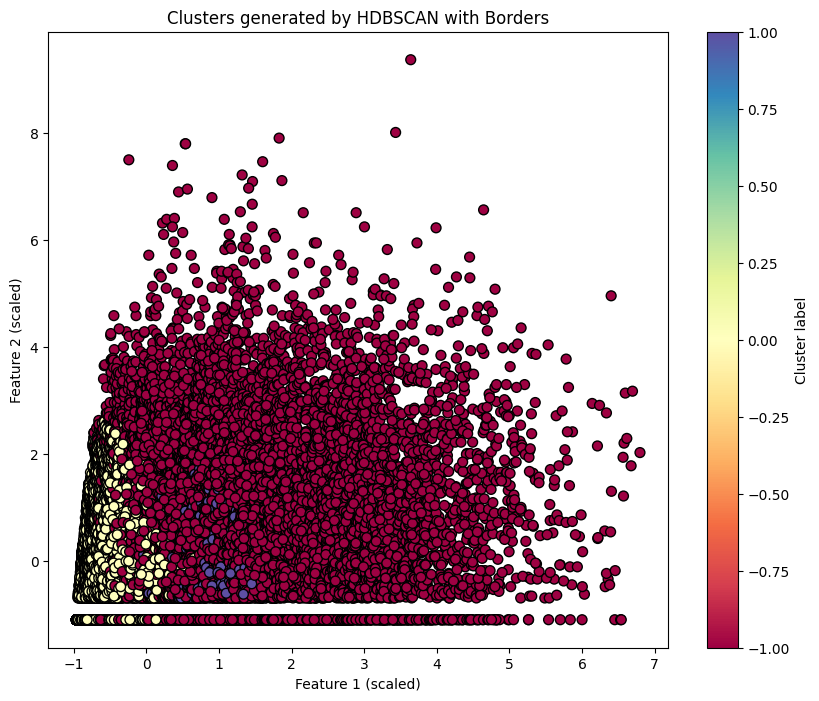

In [ ]:
# Visualization of the clusters with borders
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='Spectral', s=50, edgecolor='k')
plt.title('Clusters generated by HDBSCAN with Borders')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.colorbar(label='Cluster label')
plt.show()


### Time - series Forecasting  

###The model is training in another notebook 'CMPE_255_Time_Series_Analysis.ipynb'

In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam

# Function to create sequences
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:(i + sequence_length)])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

# Splitting the DataFrame
train_size = int(len(df) * 1)
test_size = len(df) - int(len(df) * 0.8)
train = df[0:train_size]
test = df[int(len(df) * 0.8):len(df)]

# Normalize the training data
data_train = train['Global_active_power']
scaler = MinMaxScaler(feature_range=(0, 1))
data_train_scaled = scaler.fit_transform(data_train.values.reshape(-1, 1))

# Create sequences for training dataa
sequence_length =5
X_train, y_train = create_sequences(data_train_scaled, sequence_length)
X_train = np.reshape(X_train, (X_train.shape[0], sequence_length, 1))

# Normalize the testing data
data_test = test['Global_active_power']
data_test_scaled = scaler.transform(data_test.values.reshape(-1, 1))

# Create sequences for testing data
X_test, y_test = create_sequences(data_test_scaled, sequence_length)
X_test = np.reshape(X_test, (X_test.shape[0], sequence_length, 1))



In [10]:
#MODEL ARCHITECTURE
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=25, return_sequences=False))
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')


In [12]:
from keras.models import load_model

saved_model_path = '/content/drive/Shareddrives/CMPE_255_Dataset/time_series_analysis.h5'

model = load_model(saved_model_path)

In [13]:

# Predict on the test data
predicted_test = model.predict(X_test)

# Inverse the scaling of the predictions and actual values
predicted_test = scaler.inverse_transform(predicted_test)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the model
test_mse = mean_squared_error(y_test, predicted_test)
print(f'Test Mean Squared Error: {test_mse}')

12808/12808 [==============================] - 42s 3ms/step
Test Mean Squared Error: 0.04444200404730156


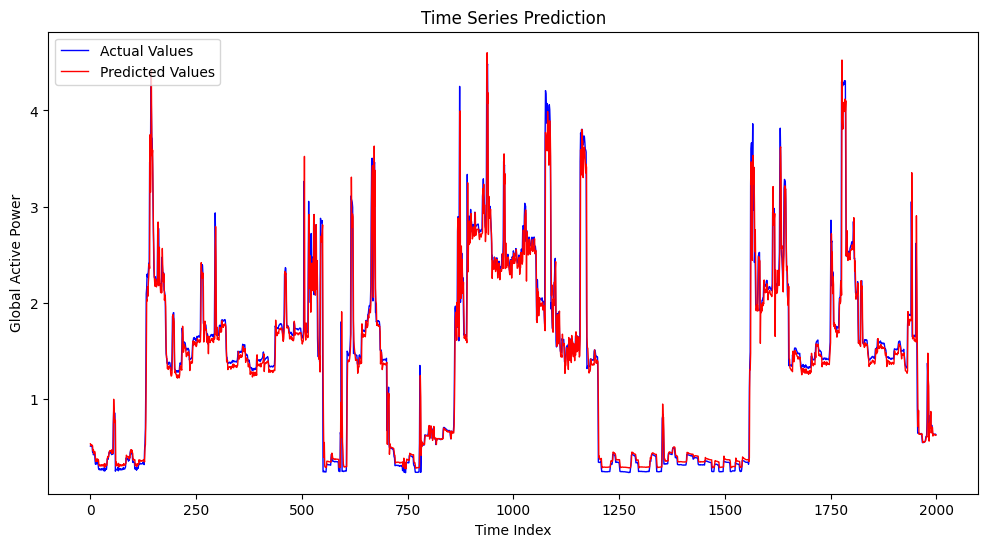

In [14]:
import matplotlib.pyplot as plt

# Flatten the arrays if they are 2D
actual = y_test.flatten()
predicted = predicted_test.flatten()


start_index = 0
end_index = 2000

# Create subsets based on the defined range
actual_subset = actual[start_index:end_index]
predicted_subset = predicted[start_index:end_index]

# Create the time series plot
plt.figure(figsize=(12, 6))
plt.plot(actual_subset, label='Actual Values', color='blue', linestyle='-', linewidth=1)
plt.plot(predicted_subset, label='Predicted Values', color='red', linestyle='-', linewidth=1)
plt.title('Time Series Prediction')
plt.xlabel('Time Index')
plt.ylabel('Global Active Power')
plt.legend()
plt.show()


### Classification

-Shireen


In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assume df is your DataFrame and it has been preprocessed accordingly

# Labeling the dataa
threshold = df['Global_active_power'].quantile(0.75)  # Example threshold
df['High_Consumption'] = (df['Global_active_power'] > threshold).astype(int)

# Feature Engineering
# df['Hour'] = df.index.hour
# df['DayOfWeek'] = df.index.dayofweek
# Add more features as needed


In [6]:
import numpy as np
# Selecting features and target
X = df.drop(['Global_active_power', 'High_Consumption', 'Datetime'], axis=1)  # Drop target and the source of the target
y = df['High_Consumption']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the classifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Predictions
y_pred = classifier.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Feature Importance
importances = classifier.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. feature {X.columns[indices[f]]} ({importances[indices[f]]})")


[[306440   1262]
 [  1243 100911]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    307702
           1       0.99      0.99      0.99    102154

    accuracy                           0.99    409856
   macro avg       0.99      0.99      0.99    409856
weighted avg       0.99      0.99      0.99    409856

Accuracy: 0.99
Feature ranking:
1. feature Global_intensity (0.9611690527330239)
2. feature Voltage (0.01393108337716657)
3. feature Global_reactive_power (0.007393903775367795)
4. feature hour (0.0034922660281482727)
5. feature day (0.0033353417956236827)
6. feature month (0.0023611220407704896)
7. feature Sub_metering_1 (0.0018398367118981234)
8. feature Sub_metering_3 (0.001780228571038687)
9. feature day_of_week (0.0017368088679718897)
10. feature year (0.0014171082175706)
11. feature Sub_metering_2 (0.0012257845475172296)
12. feature weekend (0.0003174633339029133)


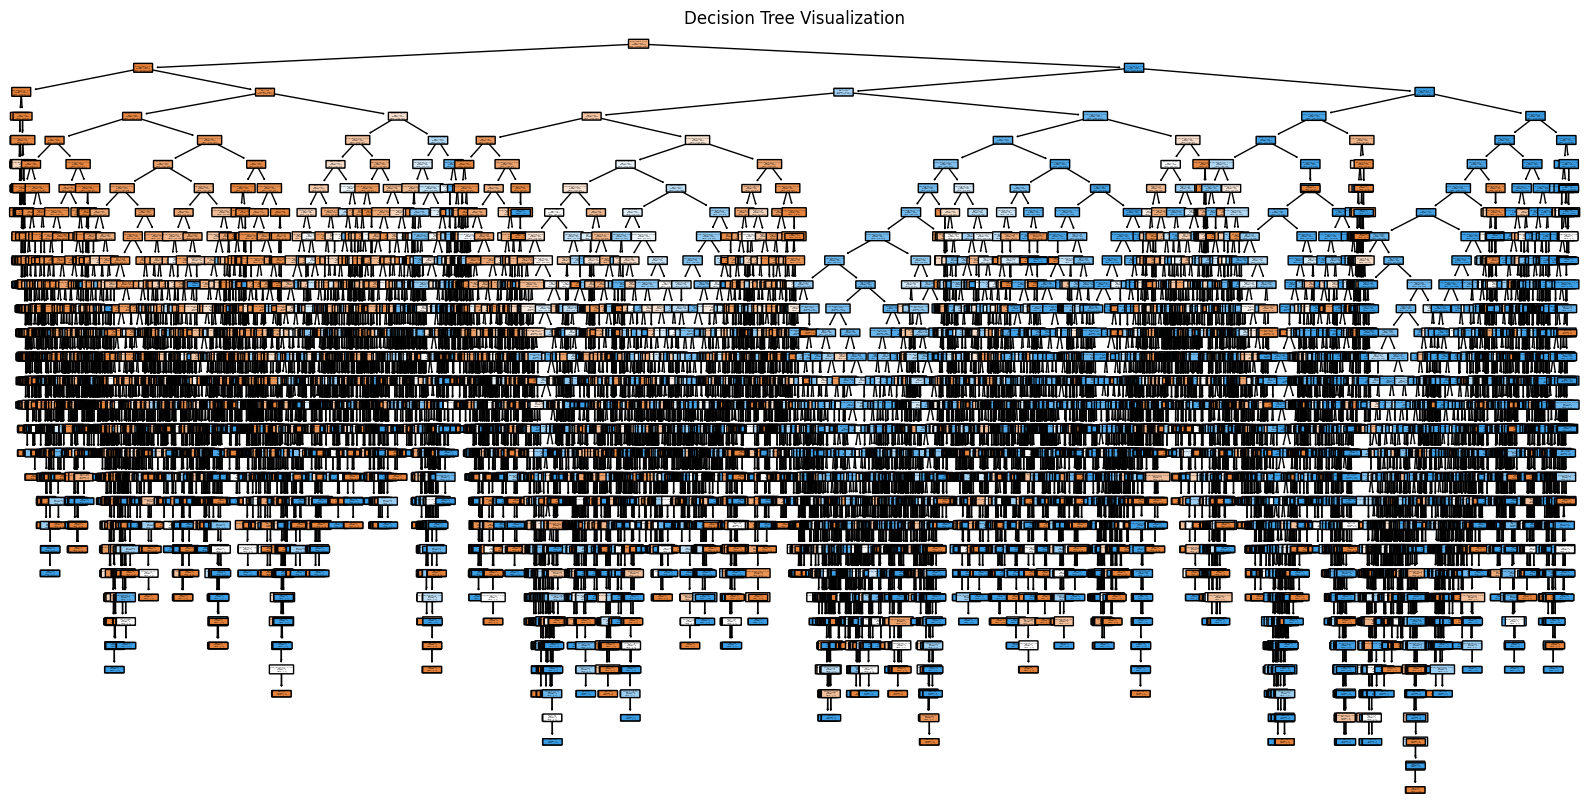

In [8]:
from sklearn.tree import  plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(classifier, filled=True, feature_names=X.columns, class_names=['Low Consumption', 'High Consumption'], rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFCtest = RandomForestClassifier().fit(X_train,y_train)
rfc_predictions = RFCtest.predict(X_test)
acc_rfc = RFCtest.score(X_test, y_test)
print("acc_score", acc_rfc)


acc_score 0.9958863600874454


In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, rfc_predictions, average='binary')  # Use 'binary' for binary classification
print("F1 Score:", f1)

F1 Score: 0.9917576776792437


In [ ]:
X.head

<bound method NDFrame.head of          Global_reactive_power  Voltage  Global_intensity  Sub_metering_1  \
0                        0.418   234.84              18.4             0.0   
1                        0.436   233.63              23.0             0.0   
2                        0.498   233.29              23.0             0.0   
3                        0.502   233.74              23.0             0.0   
4                        0.528   235.68              15.8             0.0   
...                        ...      ...               ...             ...   
2075254                  0.000   240.43               4.0             0.0   
2075255                  0.000   240.00               4.0             0.0   
2075256                  0.000   239.82               3.8             0.0   
2075257                  0.000   239.70               3.8             0.0   
2075258                  0.000   239.55               3.8             0.0   

         Sub_metering_2  Sub_metering_3  year

In [ ]:
feature_names = X_train.columns.tolist()
feature_names

['Global_reactive_power',
 'Voltage',
 'Global_intensity',
 'Sub_metering_1',
 'Sub_metering_2',
 'Sub_metering_3',
 'year',
 'month',
 'day',
 'hour',
 'day_of_week',
 'weekend',
 'Cluster']

In [ ]:
ordered_features = [
    'Global_reactive_power',
    'Voltage',
    'Global_intensity',
    'Sub_metering_1',
    'Sub_metering_2',
    'Sub_metering_3',
    'year',
    'month',
    'day',
    'hour',
    'day_of_week',
    'weekend',
    'Cluster'
]

sample_input = {
    'Global_reactive_power': 0.5,  # hypothetical value
    'Voltage': 240.0,              # hypothetical value
    'Global_intensity': 18.0,      # hypothetical value
    'Sub_metering_1': 1.0,         # hypothetical value
    'Sub_metering_2': 1.0,         # hypothetical value
    'Sub_metering_3': 1.0,         # hypothetical value
    'year': 2023,                  # current year
    'month': 6,                    # current month
    'day': 15,                     # current day
    'hour': 18,                    # current hour
    'day_of_week': 3,              # day of the week (0 = Monday, ..., 6 = Sunday)
    'weekend': 0,                  # weekend flag (0 if not a weekend, 1 if it is)
    'Cluster': 0                   # cluster assignment (from previous K-means clustering)
}

# Convert the dictionary to a DataFrame in the correct order
sample_input_df = pd.DataFrame([sample_input])[ordered_features]

# Predict using the trained classifier
predicted_class = classifier.predict(sample_input_df)

# Interpret the prediction
predicted_label = 'High Consumption' if predicted_class[0] == 1 else 'Normal Consumption'
print(f"The model predicts: {predicted_label}")

The model predicts: High Consumption


In [ ]:
High_consumption_predicted_label_RF=RFCtest.predict(sample_input_df)
High_consumption_predicted_label = 'High Consumption' if High_consumption_predicted_label_RF[0] == 1 else 'Normal Consumption'
print(f"The model predicts: {High_consumption_predicted_label}")

The model predicts: High Consumption


In [ ]:
# Sample input for a low consumption scenario
low_consumption_sample_input = {
    'Global_reactive_power': 0.2,  # lower hypothetical value
    'Voltage': 240.0,              # average voltage
    'Global_intensity': 5.0,       # lower hypothetical intensity value
    'Sub_metering_1': 0.1,         # lower hypothetical sub-metering 1 value
    'Sub_metering_2': 0.1,         # lower hypothetical sub-metering 2 value
    'Sub_metering_3': 0.1,         # lower hypothetical sub-metering 3 value
    'year': 2023,                  # current year
    'month': 4,                    # a month with potentially lower consumption
    'day': 10,                     # a day of the month
    'hour': 3,                     # an early morning hour with typically lower consumption
    'day_of_week': 2,              # middle of the week (0 = Monday, ..., 6 = Sunday)
    'weekend': 0,                  # not a weekend
    'Cluster': 1                   # a cluster associated with lower consumption if applicable
}

# Convert the dictionary to a DataFrame in the correct order
low_consumption_sample_input_df = pd.DataFrame([low_consumption_sample_input])[ordered_features]

# Predict using the trained classifier
low_consumption_predicted_class = classifier.predict(low_consumption_sample_input_df)

# Interpret the prediction
low_consumption_predicted_label = 'High Consumption' if low_consumption_predicted_class[0] == 1 else 'Normal Consumption'
print(f"The model predicts: {low_consumption_predicted_label}")


The model predicts: Normal Consumption


In [ ]:
low_consumption_predicted_label_RF=RFCtest.predict(low_consumption_sample_input_df)
low_consumption_predicted_label = 'High Consumption' if low_consumption_predicted_label_RF[0] == 1 else 'Normal Consumption'
print(f"The model predicts: {low_consumption_predicted_label}")

The model predicts: Normal Consumption
